In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib_venn import venn2


In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 5000)

# SMM4H21

In [71]:
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train.csv')
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv')
smm4h21_train

,term,start,end,text,code
0,feel kinda terrible,49,68,i better go to bed.. effexor withdrawal makes ...,10016370
1,put much weight on,64,82,@rayvenmental yeah the first time i was on ola...,10047896
2,feeling like absolute shit,42,68,forgetting to take meds then having a day feel...,10016370
3,depressed,136,145,but still dr. maria jasinskas was right &amp; ...,10012378
4,Swollen feet,116,128,day has been a right off. missed opticians&amp...,10042693
...,...,...,...,...,...
1364,limping,102,110,"09.26 day 12 rivaroxaban diary: headache, rig...",10058726
1365,back pain,79,88,"09.26 day 12 rivaroxaban diary: headache, rig...",10003988
1366,fatigue,60,67,@uclaibd i never had bleeding or vomiting just...,10016256
1367,anger,49,54,vyvanse is really taking its toll now #headach...,10002368


In [72]:
smm4h21_test

,term,start,end,text,code
0,tired,8,13,i am so tired right now. like i feel like i us...,10043890
1,gained over 20 lbs,68,86,@reneeliedig hi idk who you are but i just wan...,10047986
2,addict,42,48,@_kassidymariee maybe it's just a vyvanse addi...,10012336
3,Desperation,124,135,#schizophrenia #seroquel #sideeffects uncontro...,10016344
4,common for apartments to be haunted,79,114,the toilet just flushed itself. my apartment ...,10022989
...,...,...,...,...,...
338,zombie,103,109,seriously if you are getting off cymbalta tape...,10016384
339,withdrawals,9,20,cymbalta withdrawals. need to get script. head...,10073281
340,"back, hip, and leg aches",72,96,04.46 day 23 rivaroxaban diary. Much better th...,10003978
341,eyes worse,49,59,@joanne__howe enbrel is a miracle but it made ...,10047516


In [73]:
smm4h21_train = smm4h21_train.dropna(axis=1)
smm4h21_train['code'] = smm4h21_train['code'].astype("int64")
smm4h21_train['span_len'] = smm4h21_train.apply(lambda x: x['end']-x['start'], axis=1)

smm4h21_test = smm4h21_test.dropna(axis=1)
smm4h21_test['code'] = smm4h21_test['code'].astype("int64")
smm4h21_test['span_len'] = smm4h21_test.apply(lambda x: x['end']-x['start'], axis=1)

In [74]:
smm4h21_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   term      1369 non-null   object
 1   start     1369 non-null   int64 
 2   end       1369 non-null   int64 
 3   text      1369 non-null   object
 4   code      1369 non-null   int64 
 5   span_len  1369 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 64.3+ KB


In [75]:
smm4h21_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   term      343 non-null    object
 1   start     343 non-null    int64 
 2   end       343 non-null    int64 
 3   text      343 non-null    object
 4   code      343 non-null    int64 
 5   span_len  343 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 16.2+ KB


<AxesSubplot:xlabel='code', ylabel='Count'>

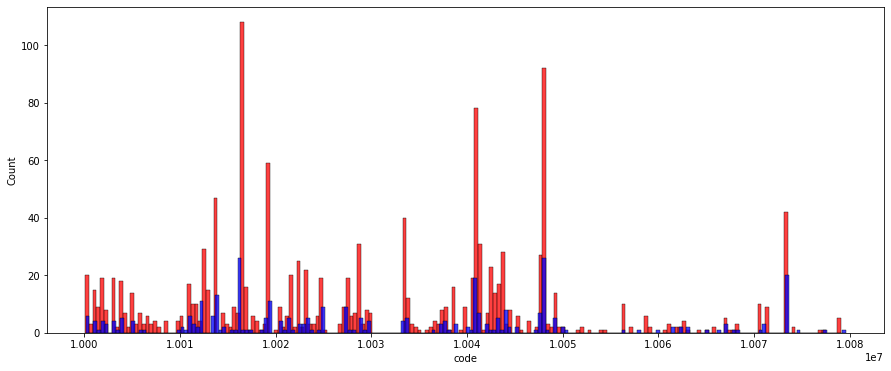

In [76]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h21_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_test['code'], bins=bins, color='blue')

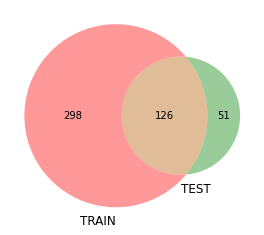

In [77]:
train_labels = set(smm4h21_train['code'].unique())
test_labels = set(smm4h21_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [78]:
smm4h21_train['code'] = smm4h21_train['code'].astype("category")
smm4h21_train.describe(include='all')

,term,start,end,text,code,span_len
count,1369,1369.000000,1369.000000,1369,1369.0,1369.000000
unique,940,NaN,NaN,1040,424.0,NaN
top,withdrawal,NaN,NaN,"09.26 day 12 rivaroxaban diary: headache, rig...",10073281.0,NaN
freq,29,NaN,NaN,8,42.0,NaN
mean,NaN,59.242513,70.949598,NaN,NaN,11.707085
std,NaN,32.915068,33.319202,NaN,NaN,7.414106
min,NaN,0.000000,5.000000,NaN,NaN,2.000000
25%,NaN,33.000000,45.000000,NaN,NaN,7.000000
50%,NaN,57.000000,68.000000,NaN,NaN,10.000000
75%,NaN,84.000000,96.000000,NaN,NaN,14.000000


In [11]:
smm4h21_test.describe(include='all')

,term,start,end,text,code,span_len
count,343,343.000000,343.000000,343,3.430000e+02,343.000000
unique,282,NaN,NaN,317,NaN,NaN
top,withdrawal,NaN,NaN,a comprehensive and accurate list of trazodone...,NaN,NaN
freq,10,NaN,NaN,3,NaN,NaN
mean,NaN,60.897959,73.064140,NaN,1.003066e+07,12.166181
std,NaN,34.930484,35.205188,NaN,1.842962e+04,8.092941
min,NaN,0.000000,9.000000,NaN,1.000008e+07,3.000000
25%,NaN,33.000000,45.000000,NaN,1.001634e+07,6.500000
50%,NaN,56.000000,68.000000,NaN,1.002881e+07,10.000000
75%,NaN,87.500000,99.500000,NaN,1.004319e+07,15.000000


# SMM4H17

In [26]:
smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train.csv')
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv')

smm4h17_train['code'] = smm4h17_train['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_train[smm4h17_train['code'].isna()].shape)
smm4h17_train = smm4h17_train[~smm4h17_train['code'].isna()]

smm4h17_test['code'] = smm4h17_test['code'].apply(lambda x: int(x) if str(x).isdigit() else None)
print(smm4h17_test[smm4h17_test['code'].isna()].shape)
smm4h17_test = smm4h17_test[~smm4h17_test['code'].isna()]
smm4h17_train

(0, 2)
(1, 2)


,term,code
0,addict,10013663
1,allergic reaction,10020751
2,pre-cutting,10022524
3,withdrawals,10048010
4,delirious,10012218
...,...,...
6645,sedation,10039897
6646,zombie,10016322
6647,hallucinations,10019063
6648,not go to sleep,10022437


In [27]:
smm4h17_test

,term,code
0,sleepier,10041349.0
1,dreamt colors,10000125.0
2,zombie,10016322.0
3,headache,10019211.0
4,crazy,10061920.0
...,...,...
2495,sleptwalk,10041347.0
2496,fatigue,10016256.0
2497,headache,10019211.0
2498,out of it,10041349.0


<AxesSubplot:xlabel='code', ylabel='Count'>

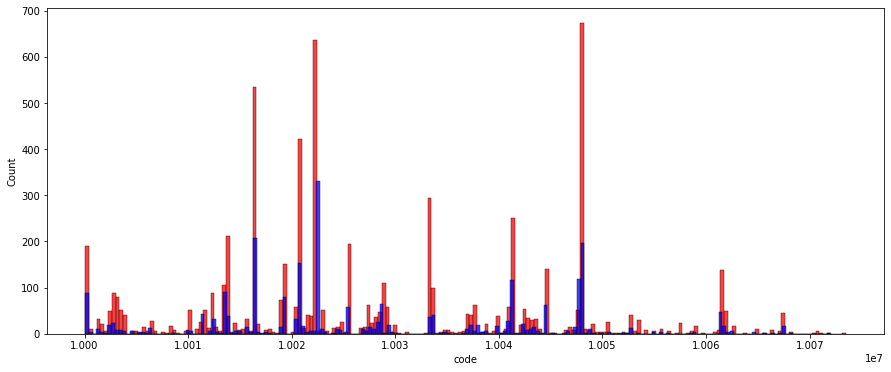

In [14]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h17_test['code'], bins=bins, color='blue')

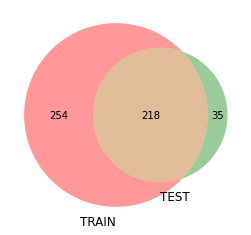

In [15]:
train_labels = set(smm4h17_train['code'].unique())
test_labels = set(smm4h17_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

# Compare SMM4h 17 and 21

In [22]:
smm4h_train = pd.concat([smm4h21_train, smm4h17_train], axis=0)
smm4h_test = pd.concat([smm4h21_test, smm4h17_test], axis=0)

smm4h_train.shape, smm4h_test.shape

((8019, 6), (2842, 6))

In [23]:
smm4h_train

,term,start,end,text,code,span_len
0,libido,50.0,56.0,gimme one reason why i shouldn't have sex driv...,10024870,6.0
1,CRAVINGS,29.0,37.0,fuck here comes the nicotine cravings damn you...,10056484,8.0
2,hurt,50.0,54.0,almost blew out my arms &amp; heels @ work. th...,10033371,4.0
3,been in bed,42.0,53.0,@teepeewest did you get floxed too? i've been...,10048948,11.0
4,no appetite,10.0,21.0,i've had no appetite since i started on prozac...,10003028,11.0
...,...,...,...,...,...,...
6645,sedation,NaN,NaN,NaN,10039897,NaN
6646,zombie,NaN,NaN,NaN,10016322,NaN
6647,hallucinations,NaN,NaN,NaN,10019063,NaN
6648,not go to sleep,NaN,NaN,NaN,10022437,NaN


<AxesSubplot:xlabel='code', ylabel='Count'>

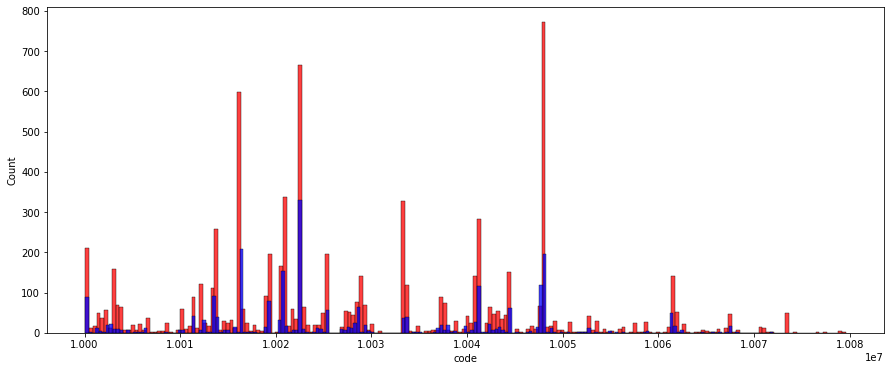

In [24]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h17_test['code'], bins=bins, color='blue')

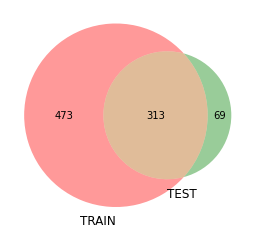

In [25]:
train_labels = set(smm4h_train['code'].unique())
test_labels = set(smm4h_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [38]:
smm4h_train['code'] = smm4h_train['code'].astype("category")
smm4h_train.describe(include='all')

,term,start,end,text,code,span_len
count,8019,1369.000000,1369.000000,1369,8019.0,1369.000000
unique,3031,NaN,NaN,1042,786.0,NaN
top,withdrawal,NaN,NaN,"09.26 day 12 rivaroxaban diary: headache, rig...",10022437.0,NaN
freq,262,NaN,NaN,7,658.0,NaN
mean,NaN,58.574872,70.130752,NaN,NaN,11.555880
std,NaN,32.933241,33.402118,NaN,NaN,7.394283
min,NaN,0.000000,5.000000,NaN,NaN,2.000000
25%,NaN,32.000000,44.000000,NaN,NaN,7.000000
50%,NaN,57.000000,69.000000,NaN,NaN,10.000000
75%,NaN,83.000000,96.000000,NaN,NaN,14.000000


# CADEC

In [28]:
cadec_train = pd.read_csv('../../data/interim/cadec/train.csv')
cadec_test = pd.read_csv('../../data/interim/cadec/test.csv')

In [30]:
cadec_train.shape, cadec_test.shape, 

((3809, 5), (953, 5))

<AxesSubplot:xlabel='code', ylabel='Count'>

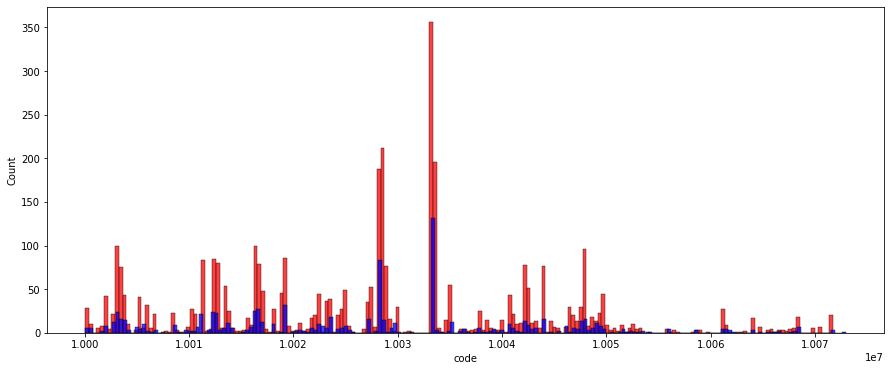

In [32]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=cadec_train['code'], bins=bins, color='red')
sns.histplot(data=cadec_test['code'], bins=bins, color='blue')

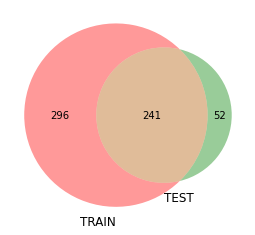

In [33]:
train_labels = set(cadec_train['code'].unique())
test_labels = set(cadec_test['code'].unique())

venn2([train_labels, test_labels], ('TRAIN', 'TEST'))
plt.show()

In [37]:
cadec_train['code'] = cadec_train['code'].astype("category")
cadec_train.describe(include='all')

,term,start,end,text,code
count,3809,3809.000000,3809.000000,3809,3809.0
unique,2297,NaN,NaN,3383,537.0
top,pain,NaN,NaN,.,10033371.0
freq,120,NaN,NaN,11,325.0
mean,NaN,192.241796,205.431609,NaN,NaN
std,NaN,256.752767,256.856750,NaN,NaN
min,NaN,0.000000,3.000000,NaN,NaN
25%,NaN,32.000000,45.000000,NaN,NaN
50%,NaN,98.000000,110.000000,NaN,NaN
75%,NaN,252.000000,266.000000,NaN,NaN


# PsyTar

In [39]:
psytar_train = pd.read_csv('../../data/interim/psytar/train.csv')
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv')

<AxesSubplot:xlabel='code', ylabel='Count'>

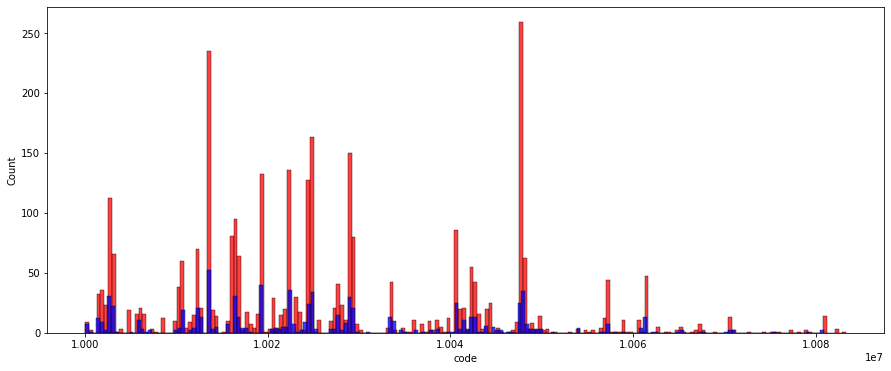

In [40]:
bins = 200

plt.figure(figsize=(15, 6))
sns.histplot(data=psytar_train['code'], bins=bins, color='red')
sns.histplot(data=psytar_test['code'], bins=bins, color='blue')

# Compare TRAIN SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

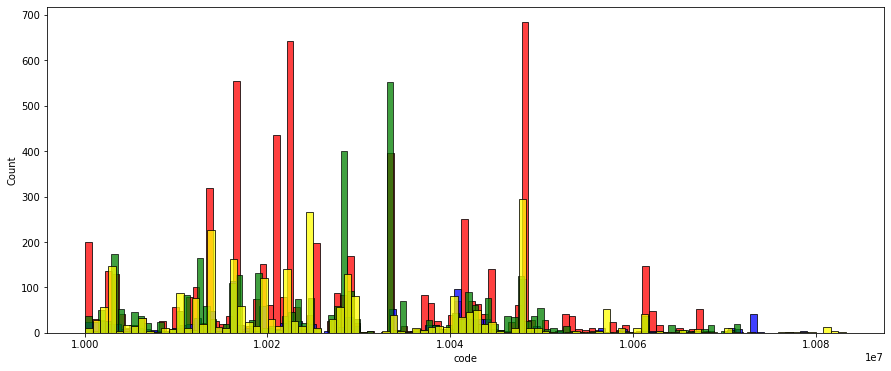

In [79]:
# smm4h17_train
# smm4h21_train
# cadec_train
# psytar_train

smm4h17_train = pd.read_csv('../../data/interim/smm4h17/train.csv').dropna()
smm4h21_train = pd.read_csv('../../data/interim/smm4h21/train.csv').dropna()
cadec_train = pd.read_csv('../../data/interim/cadec/train.csv').dropna()
psytar_train = pd.read_csv('../../data/interim/psytar/train.csv').dropna()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_train['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_train['code'], bins=bins, color='blue')
sns.histplot(data=cadec_train['code'], bins=bins, color='green')
sns.histplot(data=psytar_train['code'], bins=bins, color='yellow')

# Compare TEST SETS

<AxesSubplot:xlabel='code', ylabel='Count'>

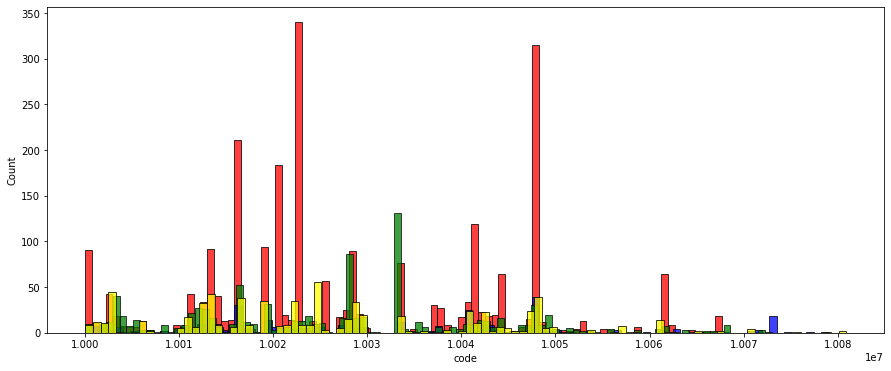

In [83]:
smm4h17_test = pd.read_csv('../../data/interim/smm4h17/test.csv').dropna()
smm4h21_test = pd.read_csv('../../data/interim/smm4h21/test.csv').dropna()
cadec_test= pd.read_csv('../../data/interim/cadec/test.csv').dropna()
psytar_test = pd.read_csv('../../data/interim/psytar/test.csv').dropna()

bins = 100

plt.figure(figsize=(15, 6))
sns.histplot(data=smm4h17_test['code'], bins=bins, color='red')
sns.histplot(data=smm4h21_test['code'], bins=bins, color='blue')
sns.histplot(data=cadec_test['code'], bins=bins, color='green')
sns.histplot(data=psytar_test['code'], bins=bins, color='yellow')